# Homework Assignment 5
## Mindy Tran
----------------------------------------------
**Question 1:** In class we looked at Principle Component Analysis as a way to do unsupervised dimensionality reduction and visualization of complex data. For this week I would like to turn you guys lose on using PCA on a new genetics dataset -- again this could be excellent training for your final project. 

[Lior Pachter](https://en.wikipedia.org/wiki/Lior_Pachter), a computational biologist at Cal Tech, wrote an [excellent blog post](https://liorpachter.wordpress.com/2014/12/02/the-perfect-human-is-puerto-rican/) on racism, population genetics, PCA, and the "perfect human". For this week's problem set I want you to:

1. Go and read Lior's blog post (link above)
2. Reproduce the PCA figures in that post. I've downloaded the SNP data and the meta data for you. You can find them in `data/pachter_human_snps.txt` and `data/pachter_meta.txt`. _note:_ the first row of the SNP data is for Pachter's "perfect human". If you include that in your PCA plot you should change it's marker or color or somehow indicate that it is different

In [1]:
import sklearn
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import decomposition
from sklearn.impute import SimpleImputer

snps = pd.read_csv("data/pachter_human_snps.txt","\t")
snps.rename(columns={'Unnamed: 0': "sampleID"}, inplace = True)
snps = snps.iloc[1: , :] # drop perfect
snps.head()

/tmp/ipykernel_1063202/3274895432.py:10: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  snps = pd.read_csv("data/pachter_human_snps.txt","\t")


,sampleID,rs307377,rs7366653,rs41307846,rs3753242,rs35082957,rs34154371,rs35426403,rs1143016,rs3890745,...,rs6007897,rs9615362,rs9627183,rs28372448,rs121913039,rs121913037,rs5770917,rs6151429,rs743616,rs2071421
1,HG00096,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,HG00097,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,HG00099,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,HG00100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,HG00101,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [2]:
imp = SimpleImputer()
snps_i = imp.fit_transform(snps.drop('sampleID',axis=1))

# Perform the PCA again retaining only the top 2 components
sklearn_pca = sklearn.decomposition.PCA(n_components=2)
sklearn_pca.fit(snps_i)


# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(snps_i),
                     columns=['PCA1', 'PCA2'])

# Create a column for species name
df_2D['sampleID'] = snps['sampleID']

In [3]:
# get metadata
meta = pd.read_csv("data/pachter_meta.txt","\t")
meta.head()

/tmp/ipykernel_1063202/2500314883.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  meta = pd.read_csv("data/pachter_meta.txt","\t")


,sample_id,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN


In [4]:
# filter our those individuals not in metadata
filt = snps.sampleID.isin(meta.sample_id)
snps_filt_m = snps[filt]
meta.sample_id

0       HG00096
1       HG00097
2       HG00099
3       HG00100
4       HG00101
         ...   
2499    NA21137
2500    NA21141
2501    NA21142
2502    NA21143
2503    NA21144
Name: sample_id, Length: 2504, dtype: object

In [5]:
# make color dict from regions
cdict = {}
current_palette = sns.color_palette()
for i,x in enumerate(meta.super_pop.unique()):
    cdict[x] = current_palette[i]
    
# associate IDs with regions in dict
bridge = {}
for idx, row in meta.iterrows():
    bridge[row.sample_id] = row.super_pop

samp_regions_cols = []
reg_name = []
keys = bridge.keys()
for idx, row in snps_filt_m.iterrows():
    samp_regions_cols.append(cdict[bridge[row.sampleID]])
    reg_name.append(bridge[row.sampleID])   

Variance percent explained
 [0.09080005 0.07390606]


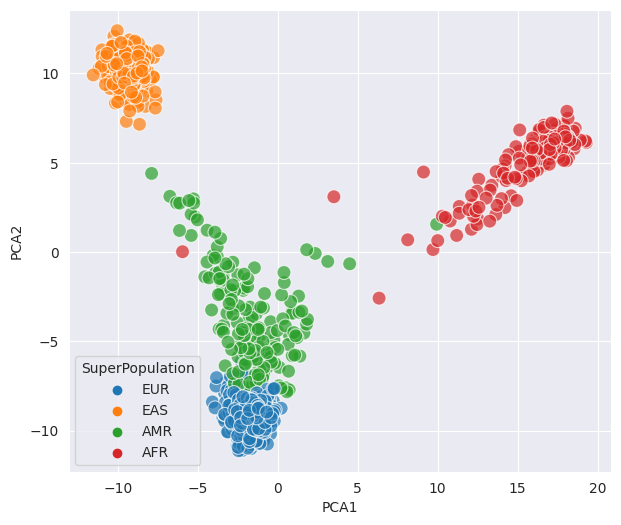

In [6]:
snps_i = imp.fit_transform(snps_filt_m.drop('sampleID',axis=1))

# Perform the PCA again retaining only the top 2 components
sklearn_pca = sklearn.decomposition.PCA(n_components=2)
sklearn_pca.fit(snps_i)


# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(snps_i),
                     columns=['PCA1', 'PCA2'])

# Create a column for species name
df_2D['sampleID'] = snps['sampleID']
df_2D['col'] = samp_regions_cols
df_2D['SuperPopulation'] = reg_name
# add part to include grey grid like in the blog
sns.set_style("dark", {'axes.grid' : True})
# plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_2D.PCA1,y=df_2D.PCA2,alpha=0.7, s=100, hue=df_2D.SuperPopulation)
print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)


Variance percent explained
 [0.09080005 0.07390606]


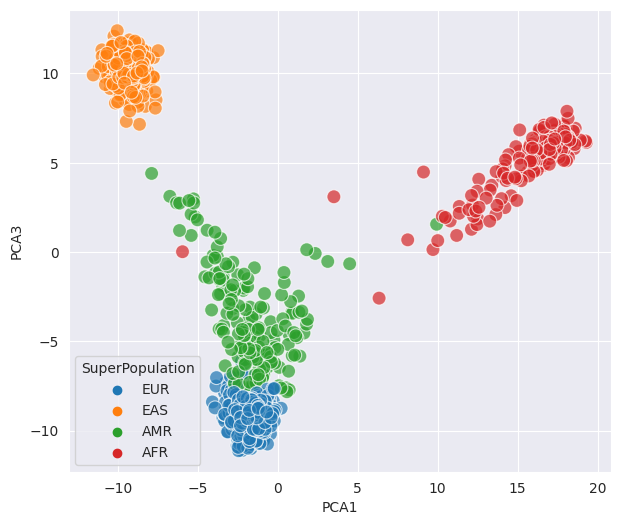

In [7]:
# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(snps_i),
                     columns=['PCA1', 'PCA3'])

# Create a column for species name
df_2D['sampleID'] = snps['sampleID']
df_2D['col'] = samp_regions_cols
df_2D['SuperPopulation'] = reg_name
# add part to include grey grid like in the blog
sns.set_style("dark", {'axes.grid' : True})
# plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_2D.PCA1,y=df_2D.PCA3,alpha=0.7, s=100, hue=df_2D.SuperPopulation)
print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)


Variance percent explained
 [0.09080005 0.07390606]


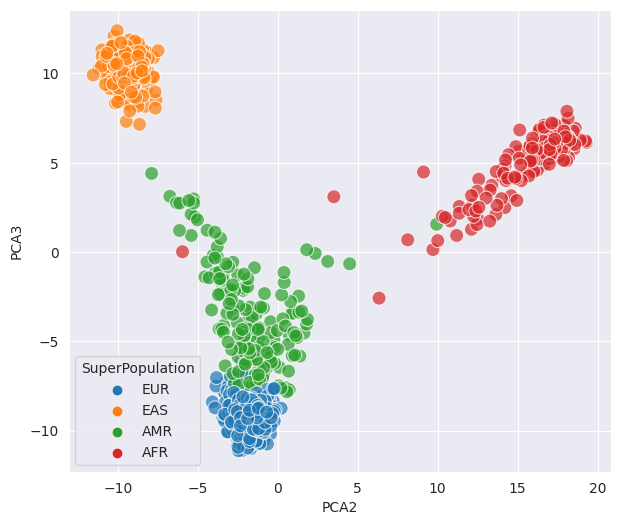

In [8]:
# Project the data into this 2D space and convert it back to a tidy dataframe
df_2D = pd.DataFrame(sklearn_pca.transform(snps_i),
                     columns=['PCA2', 'PCA3'])

# Create a column for species name
df_2D['sampleID'] = snps['sampleID']
df_2D['col'] = samp_regions_cols
df_2D['SuperPopulation'] = reg_name
# add part to include grey grid like in the blog
sns.set_style("dark", {'axes.grid' : True})
# plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_2D.PCA2,y=df_2D.PCA3,alpha=0.7, s=100, hue=df_2D.SuperPopulation)
print('Variance percent explained\n', sklearn_pca.explained_variance_ratio_)